## Name:- Rushikesh Suryakant Morepatil
## Project Name :- House Price Prediction 
## internship task 1
## company name :- Future Intern


In [5]:
import numpy as np 
import pickle
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
df = pd.read_csv("housing.csv")

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.shape


(545, 13)

In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [13]:
df= pd.get_dummies(df, drop_first=True)

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


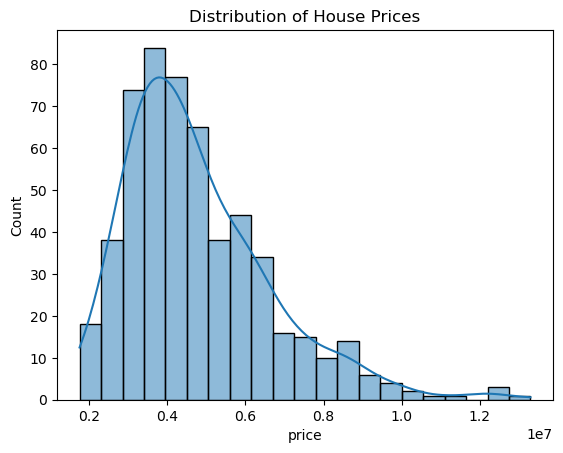

In [15]:
sns.histplot(df['price'],kde =True)
plt.title("Distribution of House Prices")
plt.show()

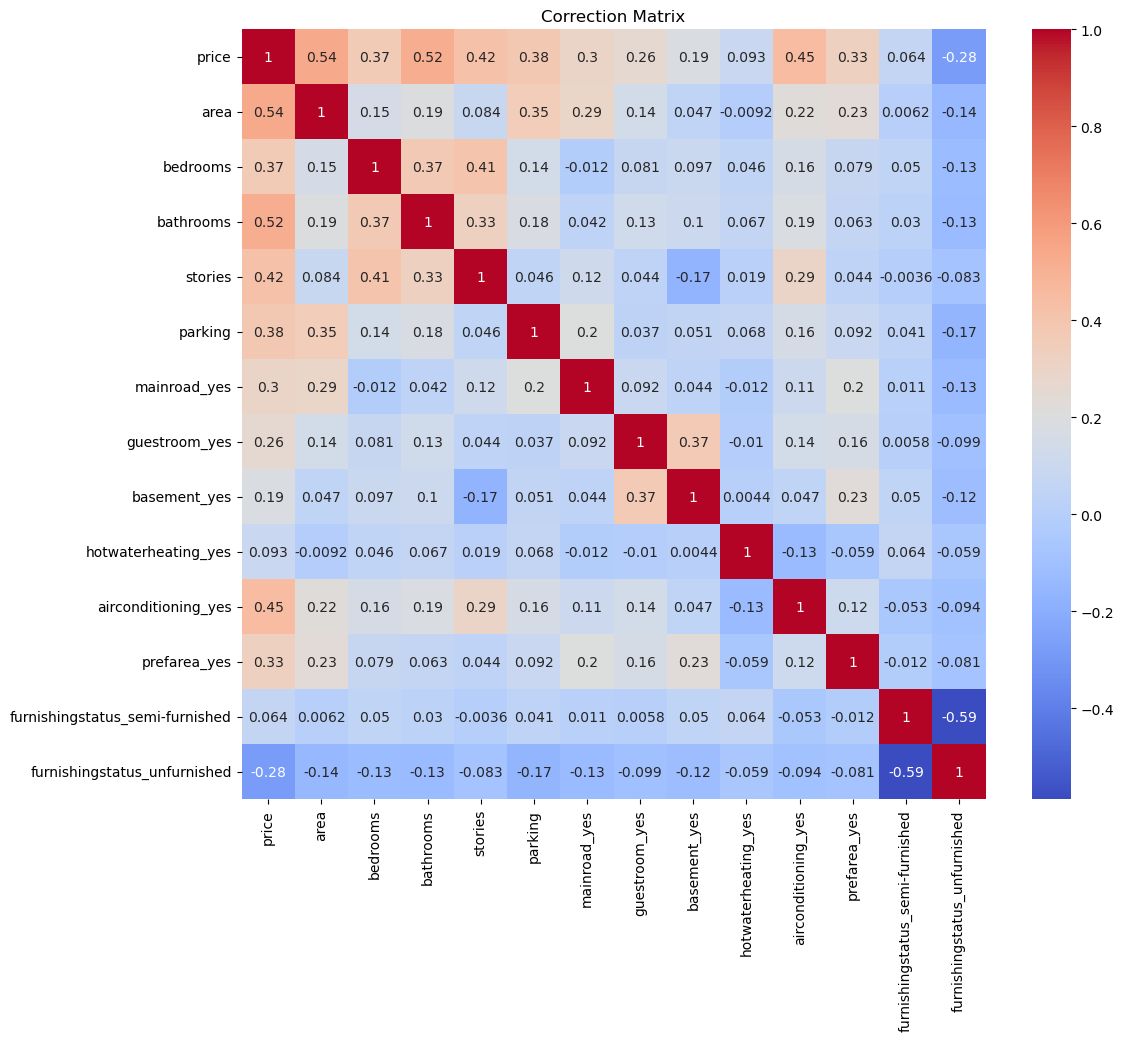

In [16]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True,cmap="coolwarm")
plt.title("Correction Matrix")
plt.show()

# Feature selection

In [21]:
selected_features = ['area','bathrooms','stories','bedrooms','airconditioning_yes','parking','mainroad_yes','guestroom_yes','prefarea_yes','basement_yes','hotwaterheating_yes']
X=df[selected_features]
y = df['price']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

# Model Buildind

### Linear Regression

In [74]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model on scaled features
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [41]:
y_pred_lr=model.predict(X_test)


### Decision tree

In [93]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [95]:
y_pred_dt=dt.predict(X_test)

## Evaluavate The Model

### Linear Regression

In [84]:
mse_lr = mean_squared_error(y_test,y_pred_lr)
r2_lr = r2_score(y_test,y_pred_lr)
print("Linear Regression MSE:",mse_lr, "R2 Score:",r2_lr)

Linear Regression MSE: 1512825302148.4956 R2 Score: 0.5704725779220862


### Decision tree

In [91]:
mse_dt = mean_squared_error(y_test,y_pred_dt)
r2_dt = r2_score(y_test,y_pred_dt)
print("Decision Tree MSE:",mse_dt, "R2 Score:",r2_dt)

Decision Tree MSE: 2104330465394.903 R2 Score: 0.402530061655217


## Save the Linear Regression Model

In [89]:
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))